In [1]:
# preamble
import lowry
Q_ = lowry.ureg.Quantity
import matplotlib.pyplot as plt, mpld3

First we need to input the data we've collected.

In [2]:
# The example Skyhawk, N6346D
N6346D = lowry.bootstrap({
    'W0': Q_('2400 lbf'),
    'S': Q_('174 ft^2'),
    'B': Q_('35.83 ft'),
    'P0': Q_('160 horsepower'),
    'n0': Q_('2700 rpm'),
    # C: 0.12,
    'd': Q_('6.25 ft'),
    'drag': {
        'W': Q_('2209 lbf'),
        'h_p': Q_('5750 ft'),
        'T': Q_(45, 'degF'),
        'VCbg': Q_('70.5 kts'),
        'dh_p': Q_('500 ft'),
        'dt': Q_('39.10 s'),
    },
    'thrust': {
        'W': Q_('2200 lbf'),
        'T': Q_(45, 'degF'),
        'h_p': Q_('5000 ft'),
        'VCx': Q_('60.5 kts'),
        'VC_M': Q_('105 kts'),
    }
})

# My airplane, an Aerotrek A220
N761S = lowry.bootstrap({
    'W0': Q_('1235 lbf'),
    'S': Q_('122.53 ft^2'),
    'A': 6.74,
    'P0': Q_('100 horsepower'),
    'n0': Q_(5800 / 2.43, 'rpm'),
    'd': Q_('5.183 ft'),
    # C: 0.12,
    'd': Q_('6.25 ft'),
    'drag': {
        'W': Q_('1010 lbf'),
        'h_p': Q_('5600 ft'),
        'dh_p': Q_('200 ft'),
        'T': Q_(72, 'degF'),
        'VCbg': Q_('63 mph'),
        'dt': Q_('26.42 s'),
    },
    'thrust': {
        'W': Q_('1010 lbf'),
        'h_p': Q_('5600 ft'),
        'dh_p': Q_('200 ft'),
        'T': Q_(72, 'degF'),
        'VCx': Q_('63 mph'),
        'dt': Q_('17.2 s'),
        'VC_M': Q_('115 mph'),
    }
})

# the result should be approxmiately
# [PoLA] table 7.1
plate71 = {
    'S': Q_('174 ft^2'),
    'A': 7.38,
    'M0': Q_('311.2 ft lbf'),
    'C': 0.12,
    'd': Q_('6.25 ft'),
    'C_D0': 0.037,
    'e': 0.72,
    'm': 1.70,
    'b': -0.0564,
}

In [9]:
# select the plate you want to use
plate = N6346D

# altitude range you want to plot
hs = range(0, 14500, 500)

# airspeeds you want to plot
vs = range(30, 130)

# airspeed unit
V_unit = 'knots'

W0 = plate['W0']

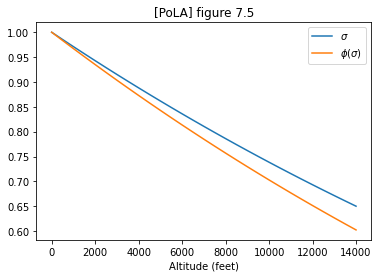

In [10]:
# just a sanity check (maybe I'll remove this later)
fig, ax = plt.subplots()
ax.plot(hs, [lowry.relativeDensity(Q_(h, 'ft')) for h in hs], label='$\sigma$')
ax.plot(hs, [lowry.dropoffFactor(Q_(h, 'ft')) for h in hs], label='$\phi(\sigma)$')
ax.set_title('[PoLA] figure 7.5')
ax.set_xlabel('Altitude (feet)')
ax.legend()

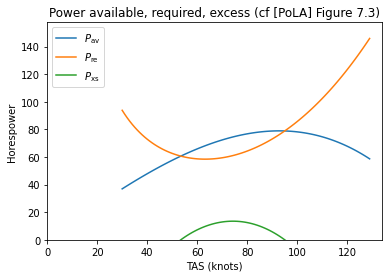

In [11]:
perf = [lowry.performance(plate, plate['W0'], Q_(8000, 'ft'), Q_(V, V_unit)) for V in vs]

fig, ax = plt.subplots()
ax.plot(vs, [x['Pav'].m_as('horsepower') for x in perf], label='$P_\mathrm{av}$')
ax.plot(vs, [x['Pre'].m_as('horsepower') for x in perf], label='$P_\mathrm{re}$')
ax.plot(vs, [x['Pxs'].m_as('horsepower') for x in perf], label='$P_\mathrm{xs}$')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title('Power available, required, excess (cf [PoLA] Figure 7.3)')
ax.set_ylabel('Horespower')
ax.set_xlabel(f"TAS ({V_unit})")
ax.legend()